In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("E:/NTI/auto-mpg_without nan.csv")
print(df.shape)
df.head()

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,1970,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,1970,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,1970,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,1970,USA,ford torino


In [3]:
df = df.drop('name', axis=1)
df['origin_encoded'] = df['origin'].astype('category').cat.codes

In [4]:
df = df.drop('origin', axis=1)


In [5]:
df = df.astype({col: float for col in df.select_dtypes(include='int').columns})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             392 non-null    float64
 1   cylinders       392 non-null    float64
 2   displacement    392 non-null    float64
 3   horsepower      392 non-null    float64
 4   weight          392 non-null    float64
 5   acceleration    392 non-null    float64
 6   year            392 non-null    float64
 7   origin_encoded  392 non-null    int8   
dtypes: float64(7), int8(1)
memory usage: 21.9 KB


In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_encoded
0,18.0,8.0,307.0,130.0,3504.0,12.0,1970.0,2
1,15.0,8.0,350.0,165.0,3693.0,11.5,1970.0,2
2,18.0,8.0,318.0,150.0,3436.0,11.0,1970.0,2
3,16.0,8.0,304.0,150.0,3433.0,12.0,1970.0,2
4,17.0,8.0,302.0,140.0,3449.0,10.5,1970.0,2


In [8]:
df_corr = df.corr().abs().round(2)
print(df_corr)


                 mpg  cylinders  displacement  horsepower  weight  \
mpg             1.00       0.78          0.81        0.78    0.83   
cylinders       0.78       1.00          0.95        0.84    0.90   
displacement    0.81       0.95          1.00        0.90    0.93   
horsepower      0.78       0.84          0.90        1.00    0.86   
weight          0.83       0.90          0.93        0.86    1.00   
acceleration    0.42       0.50          0.54        0.69    0.42   
year            0.58       0.35          0.37        0.42    0.31   
origin_encoded  0.47       0.56          0.59        0.45    0.52   

                acceleration  year  origin_encoded  
mpg                     0.42  0.58            0.47  
cylinders               0.50  0.35            0.56  
displacement            0.54  0.37            0.59  
horsepower              0.69  0.42            0.45  
weight                  0.42  0.31            0.52  
acceleration            1.00  0.29            0.26  
year   

In [9]:
features_selection=df_corr[df_corr["mpg"]>=0.7]
features_selection

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_encoded
mpg,1.00,0.78,0.81,0.78,0.83,0.42,0.58,0.47
cylinders,0.78,1.00,0.95,0.84,0.90,0.50,0.35,0.56
displacement,0.81,0.95,1.00,0.90,0.93,0.54,0.37,0.59
horsepower,0.78,0.84,0.90,1.00,0.86,0.69,0.42,0.45
weight,0.83,0.90,0.93,0.86,1.00,0.42,0.31,0.52


In [10]:
features_selection=list(df_corr[df_corr["mpg"]>=0.7].index)
features_selection

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']

In [11]:
features_selection.remove('mpg')
features_selection

['cylinders', 'displacement', 'horsepower', 'weight']

In [12]:
x = df.drop('mpg', axis=1)


In [13]:
features_selection_1= x[features_selection]
features_selection_1

,cylinders,displacement,horsepower,weight
0,8.0,307.0,130.0,3504.0
1,8.0,350.0,165.0,3693.0
2,8.0,318.0,150.0,3436.0
3,8.0,304.0,150.0,3433.0
4,8.0,302.0,140.0,3449.0
...,...,...,...,...
387,4.0,140.0,86.0,2790.0
388,4.0,97.0,52.0,2130.0
389,4.0,135.0,84.0,2295.0
390,4.0,120.0,79.0,2625.0


In [15]:
corr_matrix = x.corr().abs().round(2)

print(corr_matrix)

                cylinders  displacement  horsepower  weight  acceleration  \
cylinders            1.00          0.95        0.84    0.90          0.50   
displacement         0.95          1.00        0.90    0.93          0.54   
horsepower           0.84          0.90        1.00    0.86          0.69   
weight               0.90          0.93        0.86    1.00          0.42   
acceleration         0.50          0.54        0.69    0.42          1.00   
year                 0.35          0.37        0.42    0.31          0.29   
origin_encoded       0.56          0.59        0.45    0.52          0.26   

                year  origin_encoded  
cylinders       0.35            0.56  
displacement    0.37            0.59  
horsepower      0.42            0.45  
weight          0.31            0.52  
acceleration    0.29            0.26  
year            1.00            0.07  
origin_encoded  0.07            1.00  


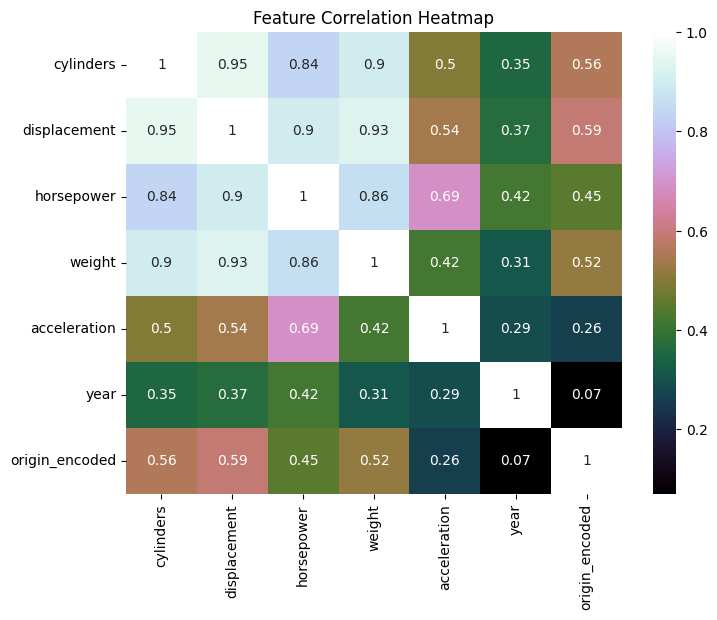

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="cubehelix")
plt.title("Feature Correlation Heatmap")
plt.show()


In [21]:
to_drop = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]

        # لو الارتباط أكبر من 0.80 نحذف أحدهم (وليكن col2)
        if corr_matrix.iloc[i, j] > 0.80:
            if col2 not in to_drop:
                to_drop.append(col2)

# حذف الأعمدة المرتبطة
x_reduced = x.drop(columns=to_drop)

# طباعة الأعمدة اللي اتحذفت والنتيجة
print("Features to drop:", to_drop)
print("\nRemaining features:")
print(x_reduced)

Features to drop: ['displacement', 'horsepower', 'weight']

Remaining features:
     cylinders  acceleration    year  origin_encoded
0          8.0          12.0  1970.0               2
1          8.0          11.5  1970.0               2
2          8.0          11.0  1970.0               2
3          8.0          12.0  1970.0               2
4          8.0          10.5  1970.0               2
..         ...           ...     ...             ...
387        4.0          15.6  1982.0               2
388        4.0          24.6  1982.0               0
389        4.0          11.6  1982.0               2
390        4.0          18.6  1982.0               2
391        4.0          19.4  1982.0               2

[392 rows x 4 columns]
